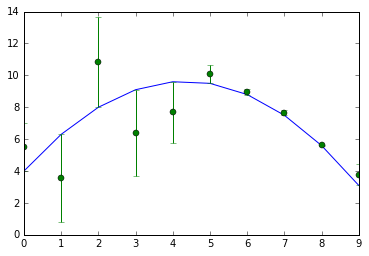

In [1]:
#generate xi^2 example
#law = ax^2 + bx + c
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

a=-0.3
b=2.6
c=4

nbp=10

tab_sigma = np.random.rand(nbp)*1+1
tab_errors = np.random.randn(nbp)*tab_sigma

tab_x = np.arange(0,nbp)


tab_val_model = a*np.power(tab_x,2) + b*tab_x + c
tab_measure = tab_val_model + tab_errors

plt.plot(tab_x, tab_val_model)
plt.errorbar(tab_x, tab_measure, yerr=tab_errors, fmt='o')
#plt.plot(tab_x, tab_measure, 'o')
plt.show()

np.savetxt('Example_chi2_2.txt', (tab_x, tab_measure, tab_sigma), delimiter=';' )

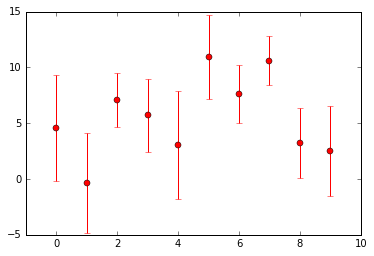

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt

x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')

plt.errorbar(x,y,err, fmt='o', color='r')
plt.xlim(-1, 10)
plt.show()

nbb=122

tab_chi2 = np.zeros( (nbb, nbb, nbb) )

tab_a = np.linspace(-1, 5, nbb)
tab_b = np.linspace(-1, 5, nbb)
tab_c = np.linspace(-1, 5, nbb)

for i in range(0,nbb):
    for j in range(0,nbb):
        for k in range(0,nbb):
            
            tab_chi2[i,j,k] = np.sum( np.power(tab_a[i]*np.power(x,2) + tab_b[j]*x + tab_c[k] - y,2)/np.power(err,2) )

     
    
t_min = np.unravel_index(tab_chi2.argmin(), tab_chi2.shape)
    
plt.pcolormesh(tab_a, tab_b, np.transpose(np.log10(tab_chi2[:,:,t_min[2]]) ), cmap='coolwarm')
plt.xlabel('a')
plt.ylabel('b')
plt.title('$Log_{10}(\chi^2)$')
plt.colorbar()
plt.show()



print (t_min[0], t_min[1], t_min[2])
print (np.argmin(tab_chi2))
print (tab_chi2[t_min])

print ('Results for a,b,c = ',tab_a[t_min[0]], tab_b[t_min[1]], tab_c[t_min[2]])

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


dof = len(x)-3
nbs = 1000
tab_val = np.linspace(1,40, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

#tab_gi = tab_gi/mt.gamma(dof/2.)
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print (index_sig[i], tab_val[index_sig[i]])

plt.plot(tab_val, tab_gi)
plt.show()

print (index_sig)

levels = tab_val[index_sig]
print ('levels 1sima, 2sigma, 3 sigma', levels)

#real values
a=-0.3
b=2.6
c=4

#fig, ax=plt.subplots(1,3, figsize = (18,6))
plt.contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
plt.plot( [a,a], [b,b], 'o')
plt.xlabel('a')
plt.ylabel('b')
plt.show()
plt.contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
plt.plot( [a,a], [c,c], 'o')
plt.xlabel('a')
plt.ylabel('c')
plt.show()
plt.contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
plt.plot( [b,b], [c,c], 'o')
plt.xlabel('b')
plt.ylabel('c')
plt.show()


best_model = tab_a[t_min[0]]*np.power(x,2) + tab_b[t_min[1]]*x + tab_c[t_min[2]]
real_model = a*np.power(x,2) + b*x + c

plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()
plt.show()

In [ ]:
##Same analysis but with an other model y=ax + b
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt

x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')

plt.errorbar(x,y,err, fmt='o', color='r')
plt.show()

nbb=101

tab_chi2 = np.zeros( (nbb, nbb) )

tab_a = np.linspace(-5, 10, nbb)
tab_b = np.linspace(-5, 10, nbb)


for i in range(0,nbb):
    for j in range(0,nbb):
            
            tab_chi2[i,j] = np.sum( np.power(tab_a[i]*x + tab_b[j] - y,2)/np.power(err,2) )

     
    
t_min = np.unravel_index(tab_chi2.argmin(), tab_chi2.shape)
    
plt.pcolormesh(tab_a, tab_b, np.transpose(np.log10(tab_chi2[:,:]) ), cmap='coolwarm')
plt.xlabel('a')
plt.ylabel('b')
plt.title('$Log_{10}(\chi^2)$')
plt.colorbar()
plt.show()



print t_min[0], t_min[1]
print np.argmin(tab_chi2)
print tab_chi2[t_min]

print 'Results for a,b= ',tab_a[t_min[0]], tab_b[t_min[1]]

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


dof = len(x)-2
nbs = 1000
tab_val = np.linspace(1,40, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

#tab_gi = tab_gi/mt.gamma(dof/2.)
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print index_sig[i], tab_val[index_sig[i]]

plt.plot(tab_val, tab_gi)
plt.show()

print index_sig

levels = tab_val[index_sig]
print levels

#real values
a=-0.3
b=2.6
c=4

#fig, ax=plt.subplots(1,3, figsize = (18,6))
plt.contour(tab_a, tab_b, np.transpose(tab_chi2[:,:]), levels)
plt.xlabel('a')
plt.ylabel('b')
plt.show()



best_model = tab_a[t_min[0]]*x + tab_b[t_min[1]]
real_model = a*np.power(x,2) + b*x + c

plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()
plt.show()

In [ ]:
##Normal model but using a second realisation

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt

x,y,err = np.loadtxt('Example_chi2_2.txt', delimiter=';')

plt.errorbar(x,y,err, fmt='o', color='r')
plt.xlim(-1, 10)
plt.show()

nbb=122

tab_chi2 = np.zeros( (nbb, nbb, nbb) )

tab_a = np.linspace(-1, 5, nbb)
tab_b = np.linspace(-1, 5, nbb)
tab_c = np.linspace(-1, 5, nbb)

for i in range(0,nbb):
    for j in range(0,nbb):
        for k in range(0,nbb):
            
            tab_chi2[i,j,k] = np.sum( np.power(tab_a[i]*np.power(x,2) + tab_b[j]*x + tab_c[k] - y,2)/np.power(err,2) )

     
    
t_min = np.unravel_index(tab_chi2.argmin(), tab_chi2.shape)
    
plt.pcolormesh(tab_a, tab_b, np.transpose(np.log10(tab_chi2[:,:,t_min[2]]) ), cmap='coolwarm')
plt.xlabel('a')
plt.ylabel('b')
plt.title('$Log_{10}(\chi^2)$')
plt.colorbar()
plt.show()



print t_min[0], t_min[1], t_min[2]
print np.argmin(tab_chi2)
print tab_chi2[t_min]

print 'Results for a,b,c = ',tab_a[t_min[0]], tab_b[t_min[1]], tab_c[t_min[2]]

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


dof = len(x)-3
nbs = 1000
tab_val = np.linspace(1,40, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

#tab_gi = tab_gi/mt.gamma(dof/2.)
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print index_sig[i], tab_val[index_sig[i]]

plt.plot(tab_val, tab_gi)
plt.show()

print index_sig

levels = tab_val[index_sig]
print levels

#real values
a=-0.3
b=2.6
c=4

#fig, ax=plt.subplots(1,3, figsize = (18,6))
plt.contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
plt.plot( [a,a], [b,b], 'o')
plt.xlabel('a')
plt.ylabel('b')
plt.show()
plt.contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
plt.plot( [a,a], [c,c], 'o')
plt.xlabel('a')
plt.ylabel('c')
plt.show()
plt.contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
plt.plot( [b,b], [c,c], 'o')
plt.xlabel('b')
plt.ylabel('c')
plt.show()


best_model = tab_a[t_min[0]]*np.power(x,2) + tab_b[t_min[1]]*x + tab_c[t_min[2]]
real_model = a*np.power(x,2) + b*x + c

plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()
plt.show()